## GROUP MEMBERS
- **Alex Chen** 
- **Paige Maple** 
- **Sam Valentine**

### Sources
1. https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb
2. ChatGPT (For formatting text and plots)

### Business Understanding (2 pts)

1. **Overview of the Dataset and Its Purpose**  
   The **Pistachio Image Dataset** ([Kaggle link](https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset)) is a carefully curated collection of images featuring two distinct pistachio varieties: **Kirmizi** and **Siirt**. These varieties differ in both **appearance and nutritional profile**. Kirmizi pistachios are known for their **vibrant color and bold flavor**, while Siirt pistachios are valued for their **smoother taste and slightly different protein content**. For example, Acar and Eti (2011) report protein ranges of **18.23–19.09% for Kirmizi** and **17.51–18.08% for Siirt**, highlighting subtle but meaningful nutritional differences.  
   The purpose of the dataset is twofold: (1) to enable the development of an advanced **image classification model** that can automatically distinguish between these varieties, and (2) to support both **processors** and **consumers** in the pistachio industry. Processors benefit from automated sorting and precise labeling, which enhances efficiency and product credibility. Consumers, on the other hand, gain confidence in identifying the pistachio variety that best suits their dietary needs or flavor preferences.  

2. **Prediction Task**  
   For our project, the **prediction task** is to build an **image classification model** that can accurately differentiate between **Kirmizi** and **Siirt pistachios**. Unlike regression-based tasks, this is a **binary classification problem**, where each pistachio image is assigned to one of the two categories. The state-of-the-art accuracy for this dataset currently stands at **99.89%**, and our objective is to **meet or exceed this benchmark**. Achieving such high precision is critical because even small misclassifications could reduce trust in the model for commercial use, especially in automated processing pipelines.  

3. **Why This Matters and Performance Expectations**  
   The results of this classification task are meaningful for **multiple stakeholders**. For **processors**, high accuracy ensures consistent quality control and reduces human error in sorting. For **consumers**, particularly those with dietary goals (e.g., athletes monitoring protein intake), the ability to reliably identify pistachio varieties supports **informed food choices**. Beyond these practical applications, this project also showcases the potential of **machine learning in agriculture**, where advanced models can streamline product handling and improve consumer knowledge.  
   By aiming for **above 99.89% accuracy**, we push the boundaries of agricultural image classification, striving to deliver a model that is both **reliable and industry-competitive**. In doing so, the Pistachio Image Dataset becomes more than just a collection of images—it becomes a **gateway to smarter agricultural practices and better consumer transparency**.  


### Data Preparation (1 pts)

#### Part One (0.5 pts)
Read in your images as numpy arrays. Resize and recolor images as necessary. 

In [ ]:
import os
import cv2
import numpy as np

dataset_path = "../dataset/Pistachio_Image_Dataset"
img_size = (128, 128)

images = []
labels = []

for variety in os.listdir(dataset_path):
    variety_path = os.path.join(dataset_path, variety)
    if not os.path.isdir(variety_path):
        continue
    
    for filename in os.listdir(variety_path):
        file_path = os.path.join(variety_path, filename)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img_resized = cv2.resize(img, img_size)
        img_array = img_resized.astype("float32") / 255.0
        images.append(img_array)
        labels.append(variety) 

images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)


(2148, 128, 128)
(2148,)
['Kirmizi_Pistachio' 'Siirt_Pistachio']


#### Part Two (0.4 pts)
Linearize the images to create a table of 1-D image features (each row should be one image).  

In [ ]:
import pandas as pd

# Create table consists of 2148 rows, where each row contains 16385 features (16384 pixels and 1 label)
N = images.shape[0]
X = images.reshape(N, -1)
y = labels  

pixel_cols = [f"pixel_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=pixel_cols)
df["label"] = y

print(df.shape)
print(df.head())

(2148, 16385)
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_16375  pixel_16376  pixel_16377  pixel_16378  \
0      0.0      0.0  ...          0.0          0.0          0.0          0.0   
1      0.0      0.0  ...          0.0          0.0          0.0          0.0   
2      0.0      0.0  ...          0.0          0.0          0.0          0.0   
3      0.0      0.0  ...          0.0          0.0          0.0          0.0   
4      0.0      0.0  ...          0.0          0.0          0.0          0.0   

   pixel_16379  pixel_16380  pixel_16381  

#### Part Three (0.1 pts)
Visualize several images.

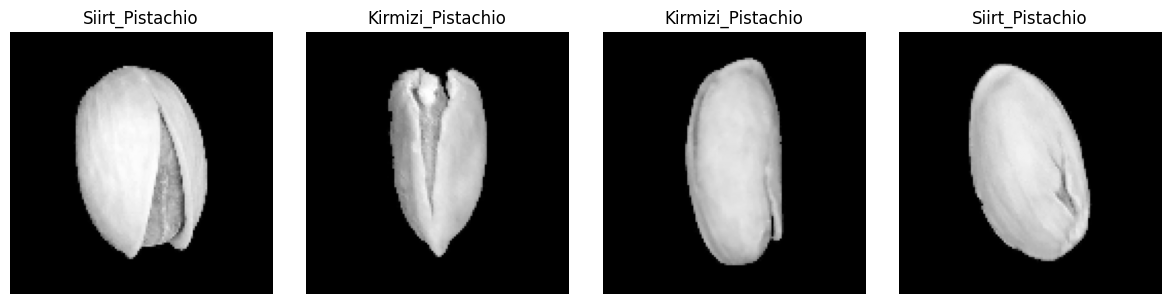

In [29]:
import matplotlib.pyplot as plt

def show_samples(images, labels, n=12, rows=3):
    cols = int(np.ceil(n / rows))
    idx = np.random.choice(len(images), n, replace=False)

    plt.figure(figsize=(cols * 3, rows * 3))
    for i, j in enumerate(idx, 1):
        img = images[j]
        if img.ndim == 3 and img.shape[-1] == 1: 
            img = img[..., 0]
        plt.subplot(rows, cols, i)
        plt.imshow(img, cmap="gray", vmin=0, vmax=1)
        plt.title(labels[j])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(images, labels, n=4, rows=1)


### Data Reduction (6 pts)

#### Part One (0.5 pts)
Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.

#### Part Two (0.5 pts)
Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.

#### Part Three (2 pts)
Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?

#### Part Four (1 pts)
Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).

#### Part Five (2 pts)
Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.  

### Exceptional Work (1 pts)
Perform feature extraction upon the images using DAISY. Rather than using matching on the images with the total DAISY vector, you will instead use key point matching. You will need to investigate appropriate methods for key point matching using DAISY. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive. Does it perform better than not using key point matching? 